# Part 1 - RGB Images

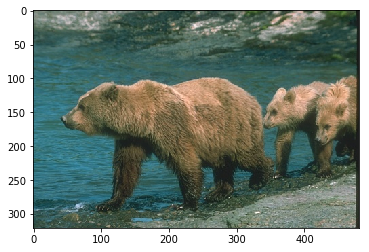

(321, 481, 3)

In [41]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import scipy.io as sio
import os

# Path of images
path = 'C:/Users/DarkB/Downloads/ML Python Scripts/Project 1/ImsAndSegs'

# Load image data
img_load = sio.loadmat('C:/Users/DarkB/Downloads/ML Python Scripts/Project 1/ImsAndSegs/ImsAndTruths100075.mat')
img = img_load['Im']
seg_im = img_load['Seg1']

# Plot image
plt.imshow(img)
plt.show()
img.shape

## K-Means Algorithm Implementation

KMeans clustering time to do: 0.04s


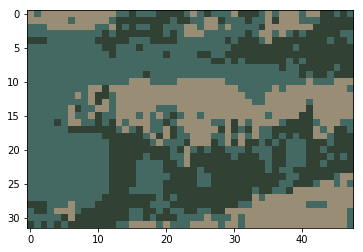

In [42]:
import time
import numpy as np
from sklearn.cluster import KMeans
from skimage.transform import rescale

#Downsample image
img_r = rescale(img,0.1,mode='reflect')
img_flat = img_r.reshape(img_r.shape[0] * img_r.shape[1], 3)
n_clusters = 3 

t0 = time.time()
# Initializing KMeans
kmeans = KMeans(n_clusters = n_clusters)

# Fitting with inputs
kmeans = kmeans.fit(img_flat)
clusters = kmeans.cluster_centers_[kmeans.predict(img_flat)]
t1 = time.time()

# Reshape flattened image
img_clustered = clusters.reshape(img_r.shape)

# Plot image
plt.imshow(img_clustered)
title = 'KMeans clustering time to do: %.2fs' % (t1 - t0)
print(title)
plt.show()

#### The big issue here is the illumination, which is a big problem for machine learning

## Self-Organizing Map Algorithm Implementation

Self-Organizing Map clustering time to do: 0.03s


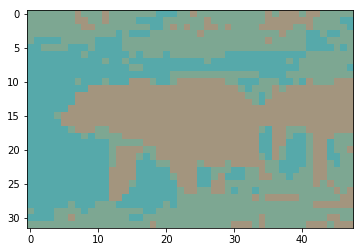

In [43]:
from minisom import MiniSom
import numpy as np
import matplotlib.pyplot as plt


# Reshaping the pixels matrix and rescaling
img_r = rescale(img,0.1,mode='reflect')
img_flat = np.reshape(img_r, (img_r.shape[0]*img_r.shape[1], 3))

n_clusters = 3

t0 = time.time()
#Uses MiniSOM algorithm to do SOM
som = MiniSom(1, n_clusters, 3, sigma=0.1, learning_rate=0.2)  # 3x1 = 3 final colors
som.random_weights_init(img_flat)
starting_weights = som.get_weights().copy()  # saving the starting weights
som.train_random(img_flat, 100)

qnt = som.quantization(img_flat)  # quantize each pixels of the image
clustered = np.zeros(img_r.shape)
for i, q in enumerate(qnt):  # place the quantized values into a new image
    clustered[np.unravel_index(i, dims=(img_r.shape[0], img_r.shape[1]))] = q
t1 = time.time()


plt.imshow(clustered)
title = 'Self-Organizing Map clustering time to do: %.2fs' % (t1 - t0)
print(title)
plt.show()

## Fuzzy C-Means Algorithm Implementation

Fuzzy C-Means clustering time to do: 0.02s


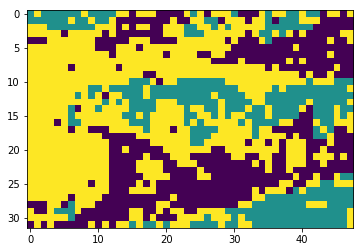

In [44]:
import skfuzzy
from skimage.transform import rescale
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

#Turn into grayscale
img_gray = rgb2gray(img)

# Rescale and reshape data
img_r = rescale(img_gray,0.1,mode='reflect')
img_flat = img_r.reshape((1, -1))

n_clusters = 3

t0 = time.time()
# Run algorithm
fzz = skfuzzy.cluster.cmeans(img_flat, c = n_clusters, m = 2, error=0.005, maxiter=1000)
t1 = time.time()

#Find clustering from fuzzy segmentation
img_clustered = np.argmax(fzz[1], axis=0).astype(float)
img_clustered.shape = img_r.shape

# Plot Image
plt.imshow(img_clustered)
title = 'Fuzzy C-Means clustering time to do: %.2fs' % (t1 - t0)
print(title)
plt.show()

## Spectral Clustering Algorithm Implementation

#### This one is based on the example - works but we lose the color data

Spectral clustering time to do: 0.24s


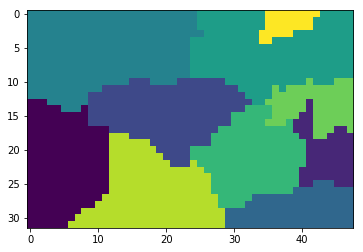

In [45]:
import time
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from sklearn.feature_extraction import image
from sklearn.cluster import spectral_clustering
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

#Turn into grayscale
img_gray = rgb2gray(img)

# Resize it to 10% of the original size to speed up the processing
img_gray = rescale(img_gray,0.1,mode='reflect')

# Convert the image into a graph with the value of the gradient on the
# edges.
graph = image.img_to_graph(img_gray)

# Take a decreasing function of the gradient: an exponential
# The smaller beta is, the more independent the segmentation is of the
# actual image. For beta=1, the segmentation is close to a voronoi
beta = 5
eps = 1e-6
graph.data = np.exp(-beta * graph.data / graph.data.std()) + eps

# Apply spectral clustering (this step goes much faster if you have pyamg
# installed)
n_clusters = 10

t0 = time.time()
# Using discretized clustering
img_clustered = spectral_clustering(graph, n_clusters=n_clusters, assign_labels = 'discretize')
t1 = time.time()
img_clustered = img_clustered.reshape(img_gray.shape)

title = 'Spectral clustering time to do: %.2fs' % (t1 - t0)
print(title)
plt.imshow(img_clustered)
plt.show()

### Gaussian Mixture Models

Gaussian Mixture Model clustering time to do: 0.03s


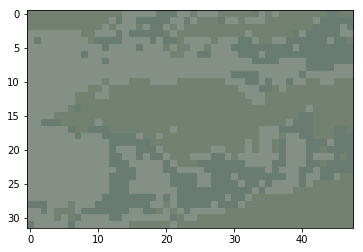

In [46]:
from sklearn import mixture

# Reshaping the image matrix
img_r = rescale(img,0.1,mode='reflect')
img_flat = np.reshape(img_r, (img_r.shape[0]*img_r.shape[1], 3))

n_clusters = 3

# Define model parameters
gmm = mixture.GaussianMixture(n_components=n_clusters, covariance_type='full')

t0 = time.time()
#Run algorithm
img_gmm = gmm.fit(img_flat)
img_clustered = img_flat[gmm.predict(img_flat)].astype(float)
t1 = time.time()

img_clustered.shape = img_r.shape

plt.imshow(img_clustered)
title = 'Gaussian Mixture Model clustering time to do: %.2fs' % (t1 - t0)
print(title)
plt.show()

# Part 2 - Hyperspectral Images

## Pavia and Santa Barbara Images

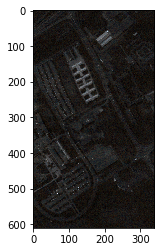

(610, 340, 3)

In [65]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import scipy.io as sio
import os


# hsimg_load = sio.loadmat('SanBarHyperIm.mat')
# hsimg_data = hsimg_load['SanBarIm88x400']
hsimg_load = sio.loadmat('PaviaHyperIm.mat')
hsimg_data = hsimg_load['PaviaHyperIm']
himage_display = hsimg_data[:,:,0:3]
plt.imshow(himage_display)
plt.show()
hsimg_data[:,:,0:3].shape

#### Number of component selection for PCA

We need about 3 components to retain 95% of the variance


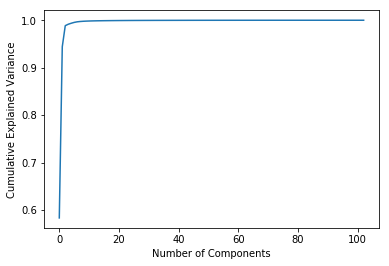

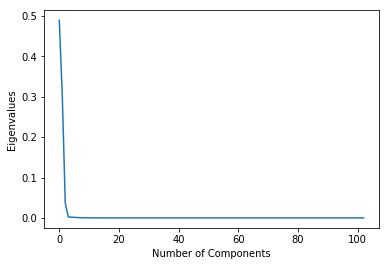

In [66]:
from sklearn.decomposition import PCA
data = hsimg_data.reshape(hsimg_data.shape[0] * hsimg_data.shape[1], hsimg_data.shape[2])
pca = PCA().fit(data)
cum_var = np.cumsum(pca.explained_variance_ratio_)
eigenvalues = pca.explained_variance_

count = 0
for var in cum_var:
    count += 1
    if var >= 0.95:
        n_components = count
        answer = "We need about "+ str(n_components) + " components to retain 95% of the variance"
        print(answer)
        break
        
plt.figure(1)
plt.plot(cum_var)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.figure(2)
plt.plot(eigenvalues)
plt.xlabel('Number of Components')
plt.ylabel('Eigenvalues')
plt.show()

# Minumum Noise Factor --> Similar to PCA but removes noise from bands

#### Do PCA

In [67]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from skimage.transform import rescale
from sklearn.cluster import KMeans
import numpy as np
import time

#Reshape to 2D - one column per component
data = hsimg_data.reshape(hsimg_data.shape[0] * hsimg_data.shape[1], hsimg_data.shape[2])

#Using PCA
pca = PCA(n_components=n_components)
reduced_data = pca.fit_transform(data)

#Since my data is not between [0,1], I rescale the data
min_max_scaler = MinMaxScaler()
reduced_data_scaled = min_max_scaler.fit_transform(reduced_data)

#Turn data back into 3 dimensions to control the downsampling of the data
reduced_data_3D = reduced_data_scaled .reshape(hsimg_data[:,:,0:3].shape)
img_r = rescale(reduced_data_3D,0.1,mode='reflect')

#Flatten my data agan for algorithm input
img_data = img_r.reshape(img_r.shape[0] * img_r.shape[1], 3)

### KMeans Algorithm

KMeans clustering time to do: 0.11s


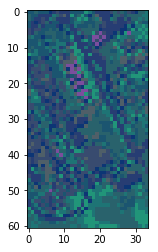

In [68]:
from sklearn.cluster import KMeans

n_clusters = 9

# Initializing KMeans
kmeans = KMeans(n_clusters=n_clusters)
# Fitting with inputs
t0 = time.time()

# Run algorithm
kmeans = kmeans.fit(img_data)
clusters = kmeans.cluster_centers_[kmeans.predict(img_data)]
t1 = time.time()

# Reshape the data into 3D
img_clustered = clusters.reshape(img_r.shape)

# Plot the data
plt.imshow(img_clustered)
title = 'KMeans clustering time to do: %.2fs' % (t1 - t0)
print(title)
plt.show()

### SOM Algorithm

Self-Organizing Map clustering time to do: 0.06s


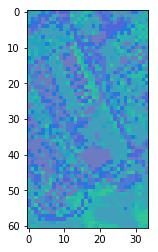

In [69]:
from minisom import MiniSom

n_clusters = 9

t0 = time.time()
#Run Algorithm
som = MiniSom(1, n_clusters, 3, sigma=0.1, learning_rate=0.2)  # 3x1 = 3 final colors
som.random_weights_init(img_data)
starting_weights = som.get_weights().copy()  # saving the starting weights
som.train_random(img_data, 100)

qnt = som.quantization(img_data)  # quantize each pixels of the image
clustered = np.zeros(img_r.shape)
for i, q in enumerate(qnt):  # place the quantized values into a new image
    clustered[np.unravel_index(i, dims=(img_r.shape[0], img_r.shape[1]))] = q
t1 = time.time()

# Plot image
plt.imshow(clustered)
title = 'Self-Organizing Map clustering time to do: %.2fs' % (t1 - t0)
print(title)
plt.show()

### Fuzzy C-Means

Fuzzy C-Means clustering time to do: 0.12s


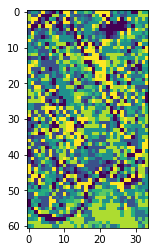

In [70]:
import skfuzzy
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

#Turn into grayscale
img_gray = rgb2gray(img_r)

# Reshape data
img_flat = img_gray.reshape((1, -1))

n_clusters = 9

t0 = time.time()
# Run algorithm
fzz = skfuzzy.cluster.cmeans(img_flat, c = n_clusters, m = 2, error=0.005, maxiter=1000)
t1 = time.time()

#Find clustering from fuzzy segmentation
img_clustered = np.argmax(fzz[1], axis=0).astype(float)
img_clustered.shape = img_gray.shape

plt.imshow(img_clustered)
title = 'Fuzzy C-Means clustering time to do: %.2fs' % (t1 - t0)
print(title)
plt.show()

### Spectral Clustering Algorithm

Spectral clustering time to do: 0.24s


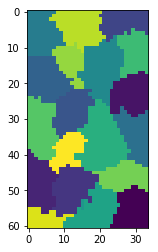

In [71]:
import time
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from sklearn.feature_extraction import image
from sklearn.cluster import spectral_clustering
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])


#Turn into grayscale
img_gray = rgb2gray(img_r)

graph = image.img_to_graph(img_gray)#, mask=mask)

beta = 5
eps = 1e-6
graph.data = np.exp(-beta * graph.data / graph.data.std()) + eps

n_clusters = 20

t0 = time.time()
img_clustered = spectral_clustering(graph, n_clusters=n_clusters, assign_labels = 'discretize')
t1 = time.time()
img_clustered = img_clustered.reshape(img_gray.shape)


title = 'Spectral clustering time to do: %.2fs' % (t1 - t0)
print(title)
plt.imshow(img_clustered)
plt.show()

### Gaussian Mixture Model Algorithm

Gaussian Mixture Model clustering time to do: 0.10s


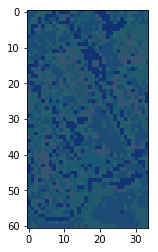

In [72]:
from sklearn import mixture

n_clusters = 9

gmm = mixture.GaussianMixture(n_components=n_clusters, covariance_type='full')

t0 = time.time()
# Run the algorithm
img_gmm = gmm.fit(img_data)
img_clustered = img_data[gmm.predict(img_data)].astype(float)
t1 = time.time()

# Reshape the data
img_clustered.shape = img_r.shape

# Plot the data
plt.imshow(img_clustered)
title = 'Gaussian Mixture Model clustering time to do: %.2fs' % (t1 - t0)
print(title)
plt.show()